## Formula 1 Dataset introduce

Formula 1 is an international car racing competition. 
Drivers from around the world compete for a title, and 
the races are held in various countries, making it a 
global event.

Each driver is part of a team called a “Constructor,” 
typically sponsored by a specific car manufacturer.

## All Questions:

**a) Which three constructors had the highest number of total points between 1981 and 2020?**  
- How many total points did each of them get?  
- How do the total number of points for each constructor compare to the average across constructors?

**b) Which three constructors had the highest number of total points between 2001 and 2020?**  
- How many total points did each of them get?  
- How do the total number of points for each constructor compare to the average across constructors?

**c) How did the rankings change across the two time periods?**

**d) How many different drivers did Ferrari have between 1981 and 2020?**

**e) What was the best year for Ferrari between 1981 and 2020?**

In [19]:
import numpy as np
import pandas as pd

In [20]:
# import data
constructor_standings_raw = pd.read_csv("/Users/jiangshuyue/Desktop/QTM/qtm530fall2024/Formula1/constructor_standings.csv")

In [21]:
constructor_standings_raw

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0
...,...,...,...,...,...,...,...
13266,28848,1132,15,0.0,10,10,0
13267,28849,1132,210,27.0,7,7,0
13268,28850,1132,215,31.0,6,6,0
13269,28851,1132,3,4.0,9,9,0


In [22]:

# Extract the relevant columns
data = constructor_standings_raw[['raceId', 'constructorId', 'points']]

# Check for duplicates in the extracted columns
duplicates = data[data.duplicated(subset=['raceId', 'constructorId', 'points'], keep=False)]

# Display the results
if duplicates.empty:
    print("No duplicates found. Each constructor in each race is awarded only one set of points.")
else:
    print("Duplicates found. Some constructors have multiple entries for points in the same race:")
    print(duplicates)


No duplicates found. Each constructor in each race is awarded only one set of points.


# Question a
**Which three constructors had the highest number of total points between 1981 and 2020?**  
- How many total points did each of them get?  
- How do the total number of points for each constructor compare to the average across constructors?

**coding step:**
- using datasets: constructor_results_raw, constructor_information_raw, race_information_raw
- clean the datasets, rename some columns
- find race from 1981-2020 from dataset "race_information"
- merge competition results with race time to find all the race result from 1981 to 2020 (dataset: constructor_results_from_1981_to_2020)
- calculate the total points for each constructor
- merge the result with constructor's name in dataset "constructor_information"
- rank each constructor's total point


In [23]:
# import data
constructor_results_raw = pd.read_csv("/Users/jiangshuyue/Desktop/QTM/qtm530fall2024/Formula1/constructor_results.csv")
constructor_information_raw = pd.read_csv("/Users/jiangshuyue/Desktop/QTM/qtm530fall2024/Formula1/constructors.csv")
race_information_raw = pd.read_csv("/Users/jiangshuyue/Desktop/QTM/qtm530fall2024/Formula1/races.csv")

# data cleaning
constructor_information = constructor_information_raw.rename(columns={'name':'constructor_name'})
race_information = race_information_raw.rename(columns={'name':'race_name'})

In [24]:
constructor_results_raw

,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,\N
1,2,18,2,8.0,\N
2,3,18,3,9.0,\N
3,4,18,4,5.0,\N
4,5,18,5,2.0,\N
...,...,...,...,...,...
12500,17005,1132,117,10.0,\N
12501,17006,1132,3,2.0,\N
12502,17007,1132,215,1.0,\N
12503,17008,1132,15,0.0,\N


In [25]:
# descriptive statistics
# check sample size for each dataset
print("Constructor Results Raw Shape:", constructor_results_raw.shape)
print("Constructor Information Raw Shape:", constructor_information_raw.shape)
print("Race Information Raw Shape:", race_information_raw.shape)

# check for missing values in each dataset
print("\nMissing Values in Constructor Results Raw:")
print(constructor_results_raw.isnull().sum())

print("\nMissing Values in Constructor Information Raw:")
print(constructor_information_raw.isnull().sum())

print("\nMissing Values in Race Information Raw:")
print(race_information_raw.isnull().sum())

# compute descriptive statistics for each dataset
print("\nDescriptive Statistics for Constructor Results Raw:")
print(constructor_results_raw.describe(include='all'))

print("\nDescriptive Statistics for Constructor Information Raw:")
print(constructor_information_raw.describe(include='all'))

print("\nDescriptive Statistics for Race Information Raw:")
print(race_information_raw.describe(include='all'))


Constructor Results Raw Shape: (12505, 5)
Constructor Information Raw Shape: (212, 5)
Race Information Raw Shape: (1125, 18)

Missing Values in Constructor Results Raw:
constructorResultsId    0
raceId                  0
constructorId           0
points                  0
status                  0
dtype: int64

Missing Values in Constructor Information Raw:
constructorId     0
constructorRef    0
name              0
nationality       0
url               0
dtype: int64

Missing Values in Race Information Raw:
raceId         0
year           0
round          0
circuitId      0
name           0
date           0
time           0
url            0
fp1_date       0
fp1_time       0
fp2_date       0
fp2_time       0
fp3_date       0
fp3_time       0
quali_date     0
quali_time     0
sprint_date    0
sprint_time    0
dtype: int64

Descriptive Statistics for Constructor Results Raw:
        constructorResultsId        raceId  constructorId        points status
count           12505.000000  12505

In [26]:
# find race from 1981-2020
race_information_from_1981_to_2020 = race_information.query("(year >= 1981) and (year <= 2020)")
race_information_from_1981_to_2020

,raceId,year,round,circuitId,race_name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030,1043,2020,13,21,Emilia Romagna Grand Prix,2020-11-01,12:10:00,http://en.wikipedia.org/wiki/2020_Emilia_Romag...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1031,1044,2020,14,5,Turkish Grand Prix,2020-11-15,10:10:00,http://en.wikipedia.org/wiki/2020_Turkish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1032,1045,2020,15,3,Bahrain Grand Prix,2020-11-29,14:10:00,http://en.wikipedia.org/wiki/2020_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1033,1046,2020,16,3,Sakhir Grand Prix,2020-12-06,17:10:00,http://en.wikipedia.org/wiki/2020_Sakhir_Grand...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [27]:
constructor_results_from_1981_to_2020 = pd.merge(constructor_results_raw,# each constructor's points
                                                 race_information_from_1981_to_2020[["raceId","year"]],# here is race id from 1981 to 2020
                                                 on = "raceId",
                                                 how = "right")#save all the race result from 1981 to 2020
constructor_results_from_1981_to_2020

,constructorResultsId,raceId,constructorId,points,status,year
0,3823,1,23,18.0,\N,2009
1,3824,1,1,0.0,\N,2009
2,3825,1,7,11.0,\N,2009
3,3826,1,4,4.0,\N,2009
4,3827,1,3,3.0,\N,2009
...,...,...,...,...,...,...
8573,16225,1047,211,1.0,\N,2020
8574,16226,1047,51,0.0,\N,2020
8575,16227,1047,6,0.0,\N,2020
8576,16228,1047,3,0.0,\N,2020


In [28]:
constructor_results_from_1981_to_2020

,constructorResultsId,raceId,constructorId,points,status,year
0,3823,1,23,18.0,\N,2009
1,3824,1,1,0.0,\N,2009
2,3825,1,7,11.0,\N,2009
3,3826,1,4,4.0,\N,2009
4,3827,1,3,3.0,\N,2009
...,...,...,...,...,...,...
8573,16225,1047,211,1.0,\N,2020
8574,16226,1047,51,0.0,\N,2020
8575,16227,1047,6,0.0,\N,2020
8576,16228,1047,3,0.0,\N,2020


In [29]:
total_points_per_constructor_from_1981_to_2020 = constructor_results_from_1981_to_2020.groupby('constructorId')['points'].sum().reset_index()
total_points_per_constructor_from_1981_to_2020 = total_points_per_constructor_from_1981_to_2020.sort_values('points', ascending=False)
total_points_per_constructor_from_1981_to_2020

,constructorId,points
5,6,7374.0
56,131,5685.0
0,1,5229.5
8,9,5043.5
2,3,3355.0
...,...,...
37,38,0.0
35,36,0.0
12,13,0.0
13,14,0.0


In [30]:
average_points_from_1981_to_2020 = total_points_per_constructor_from_1981_to_2020['points'].mean()
print(average_points_from_1981_to_2020)

532.2388059701492


In [31]:

constructor_name_point_from_1981_to_2020 = pd.merge(total_points_per_constructor_from_1981_to_2020,# each constructor's total points
                                  constructor_information[["constructorId","constructor_name"]],# merge constructorid with their name
                                                 on = "constructorId",
                                                 how = "left")
constructor_name_point_from_1981_to_2020

,constructorId,points,constructor_name
0,6,7374.0,Ferrari
1,131,5685.0,Mercedes
2,1,5229.5,McLaren
3,9,5043.5,Red Bull
4,3,3355.0,Williams
...,...,...,...
62,38,0.0,Andrea Moda
63,36,0.0,Fondmetal
64,13,0.0,MF1
65,14,0.0,Spyker MF1


In [32]:
constructor_name_point_from_1981_to_2020['average_points'] = average_points_from_1981_to_2020
constructor_name_point_from_1981_to_2020

,constructorId,points,constructor_name,average_points
0,6,7374.0,Ferrari,532.238806
1,131,5685.0,Mercedes,532.238806
2,1,5229.5,McLaren,532.238806
3,9,5043.5,Red Bull,532.238806
4,3,3355.0,Williams,532.238806
...,...,...,...,...
62,38,0.0,Andrea Moda,532.238806
63,36,0.0,Fondmetal,532.238806
64,13,0.0,MF1,532.238806
65,14,0.0,Spyker MF1,532.238806


- visualization

In [33]:
import seaborn as sns

# filter the top 3 constructors based on points
top_3 = constructor_name_point_from_1981_to_2020.head(3)
print("top 3 constructors:")
print(top_3)
colors = sns.color_palette('deep', 3)

plt.figure(figsize=(8, 6))
plt.bar(top_3['constructor_name'], top_3['points'], color=colors)
plt.xlabel('Constructor Name')
plt.ylabel('Points')
plt.title('Top 3 Constructors (1981-2020)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


top 3 constructors:
   constructorId  points constructor_name  average_points
0              6  7374.0          Ferrari      532.238806
1            131  5685.0         Mercedes      532.238806
2              1  5229.5          McLaren      532.238806


NameError: name 'plt' is not defined

# Answer a 
**Which three constructors had the highest number of total points between 1981 and 2020?**  
Ferrari, Mercedes, McLaren
- How many total points did each of them get?  
Ferrari 7374, Mercedes 5685, McLaren 5229
- How do the total number of points for each constructor compare to the average across constructors?
use a bar chart to answer

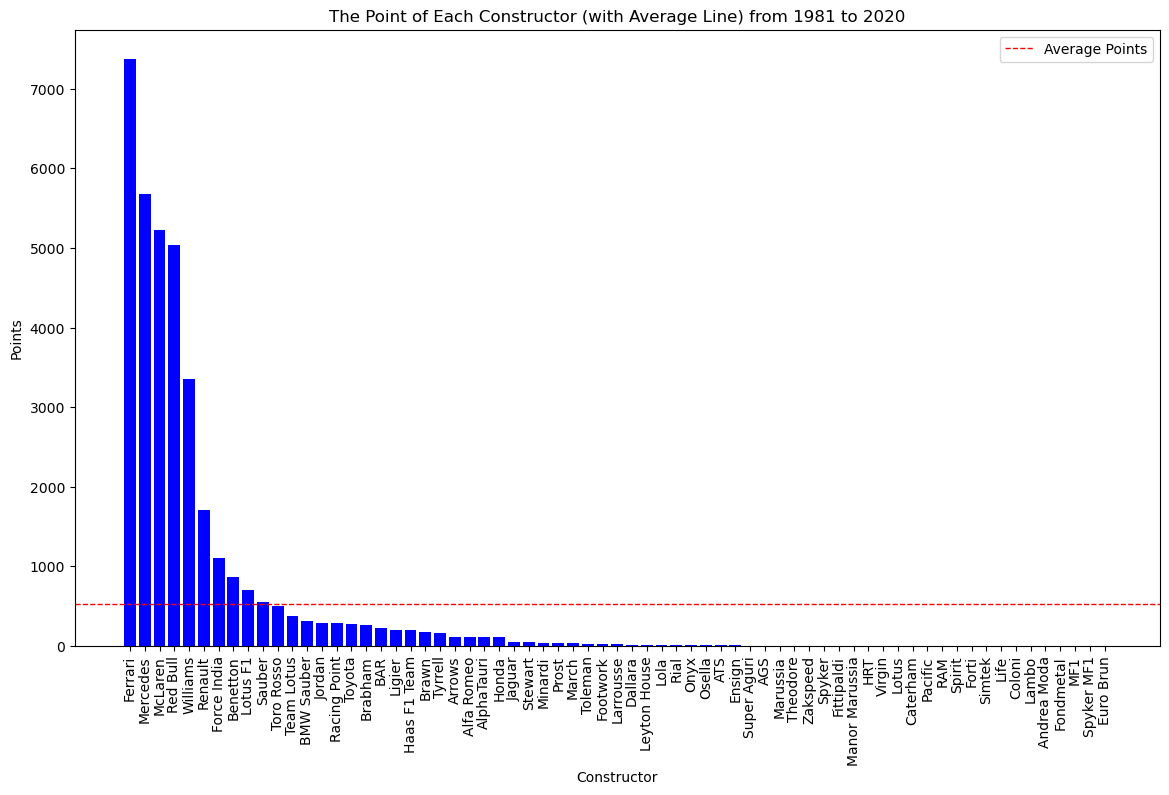

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))

plt.bar(constructor_name_point_from_1981_to_2020['constructor_name'], constructor_name_point_from_1981_to_2020['points'], color='blue')

# an average line across the chart
plt.axhline(constructor_name_point_from_1981_to_2020['average_points'].mean(), color='red', linestyle='dashed', linewidth=1, label='Average Points')

# titles of the chart
plt.xlabel('Constructor')
plt.ylabel('Points')
plt.title('The Point of Each Constructor (with Average Line) from 1981 to 2020')
plt.xticks(rotation=90)  # rotate x-axis labels to avoid overlap
plt.legend()


plt.show()

In [18]:
constructor_results_from_1981_to_2020 = pd.merge(constructor_results_raw,# each constructor's points
                                                 race_information_from_1981_to_2020[["raceId","year"]],# here is race id from 1981 to 2020
                                                 on = "raceId",
                                                 how = "left")#save all the race result from 1981 to 2020
constructor_results_from_1981_to_2020

NameError: name 'constructor_results_raw' is not defined

# Question b
 **Which three constructors had the highest number of total points between 2001 and 2020?**  
- How many total points did each of them get?  
- How do the total number of points for each constructor compare to the average across constructors?


**coding step:**
- find race from 192001-2020 from dataset "race_information"
- merge competition results with race time to find all the race result from 2001 to 2020 (dataset: constructor_results_from_2001_to_2020)
- calculate the total points for each constructor
- merge the result with constructor's name in dataset "constructor_information"
- rank each constructor's total point

In [55]:
# find race from 2001 to 2020
race_information_from_2001_to_2020 = race_information.query("(year >= 2001) and (year <= 2020)")

# get all the constructor ace result from 2001 to 2020
constructor_results_from_2001_to_2020 = pd.merge(constructor_results_raw,# each constructor's points
                                                 race_information_from_2001_to_2020[["raceId","year"]],# here is race id from 2001 to 2020
                                                 on = "raceId",
                                                 how = "right")#save all the race result from 2001 to 2020

# get every constructor's total point from 2001 to 2020
total_points_per_constructor_from_2001_to_2020 = constructor_results_from_2001_to_2020.groupby('constructorId')['points'].sum().reset_index()
total_points_per_constructor_from_2001_to_2020.sort_values('points', ascending=False)

# get the average point of constructor
average_points_from_2001_to_2020 = total_points_per_constructor_from_2001_to_2020['points'].mean()
print(average_points_from_2001_to_2020)

786.0142857142857


In [56]:
# merge constructor's total point with their name
constructor_name_point_from_2001_to_2020 = pd.merge(total_points_per_constructor_from_2001_to_2020,# each constructor's total points
                                  constructor_information[["constructorId","constructor_name"]],# merge constructorid with their name
                                                 on = "constructorId",
                                                 how = "left")
constructor_name_point_from_2001_to_2020['average_points'] = average_points_from_2001_to_2020
constructor_name_point_from_2001_to_2020 = constructor_name_point_from_2001_to_2020.sort_values('points', ascending=False)

In [57]:
constructor_name_point_from_2001_to_2020

,constructorId,points,constructor_name,average_points
5,6,5862.0,Ferrari,786.014286
24,131,5685.0,Mercedes,786.014286
8,9,5043.5,Red Bull,786.014286
0,1,3284.0,McLaren,786.014286
2,3,1535.5,Williams,786.014286
3,4,1465.0,Renault,786.014286
9,10,1098.0,Force India,786.014286
30,208,706.0,Lotus F1,786.014286
4,5,500.0,Toro Rosso,786.014286
14,15,467.0,Sauber,786.014286


- visualization

top 3 constructors:
    constructorId  points constructor_name  average_points  rank_2001-2020
5               6  5862.0          Ferrari      786.014286             1.0
24            131  5685.0         Mercedes      786.014286             2.0
8               9  5043.5         Red Bull      786.014286             3.0


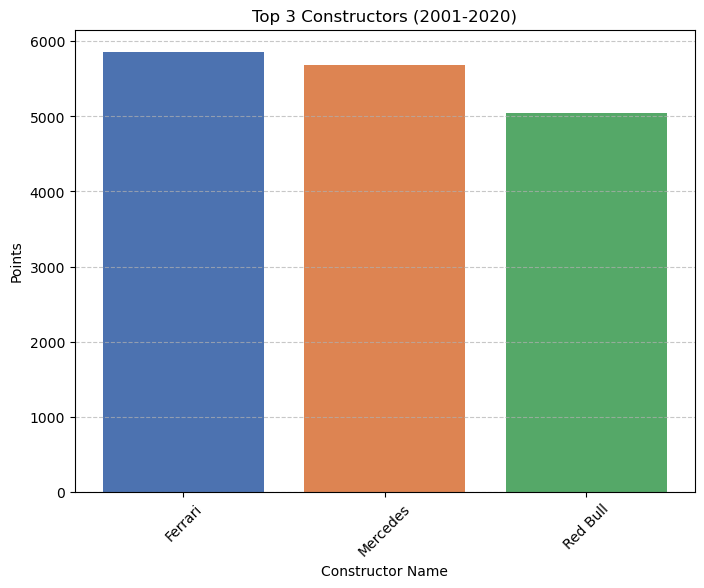

In [82]:
# filter the top 3 constructors based on points
top_3 = constructor_name_point_from_2001_to_2020.head(3)
print("top 3 constructors:")
print(top_3)
colors = sns.color_palette('deep', 3)

plt.figure(figsize=(8, 6))
plt.bar(top_3['constructor_name'], top_3['points'], color=colors)
plt.xlabel('Constructor Name')
plt.ylabel('Points')
plt.title('Top 3 Constructors (2001-2020)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

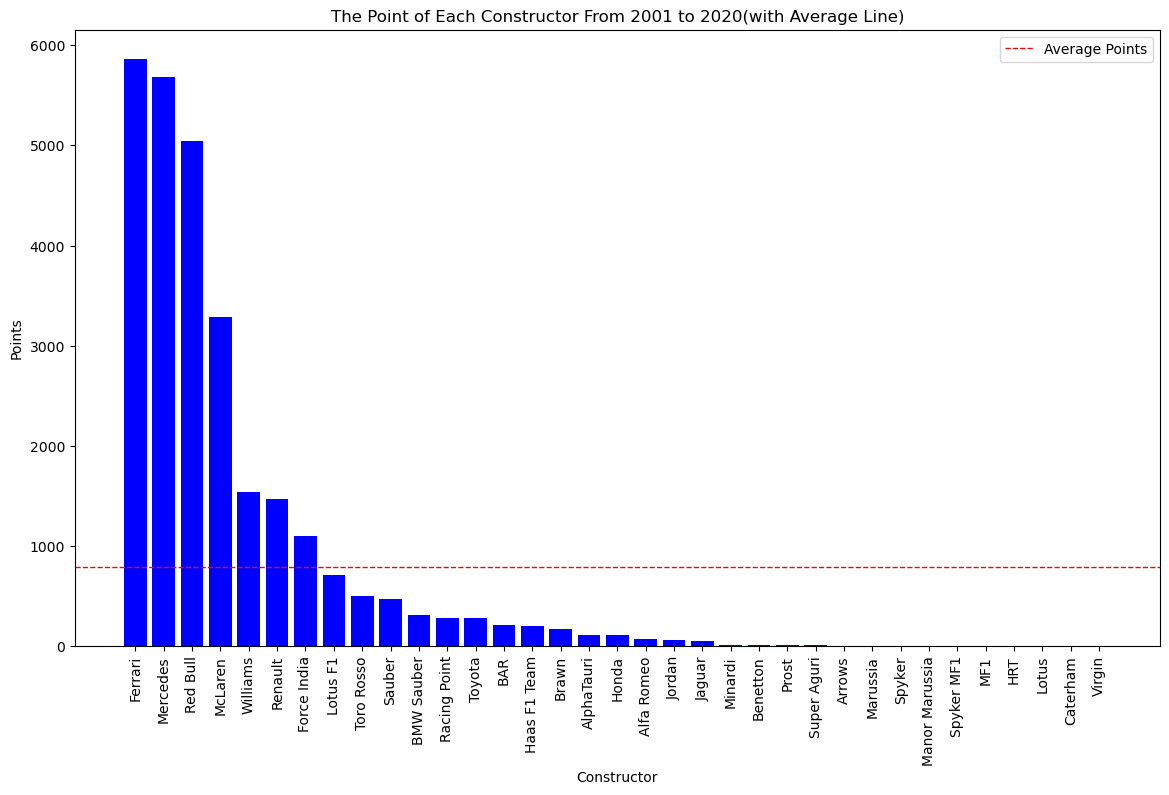

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))

plt.bar(constructor_name_point_from_2001_to_2020['constructor_name'], constructor_name_point_from_2001_to_2020['points'], color='blue')

# an average line across the chart
plt.axhline(constructor_name_point_from_2001_to_2020['average_points'].mean(), color='red', linestyle='dashed', linewidth=1, label='Average Points')

# titles of the chart
plt.xlabel('Constructor')
plt.ylabel('Points')
plt.title('The Point of Each Constructor From 2001 to 2020(with Average Line)')
plt.xticks(rotation=90)  # rotate x-axis labels to avoid overlap
plt.legend()


plt.show()

# Answer b
 **Which three constructors had the highest number of total points between 2001 and 2020?**  
Ferrari, Mercedes, Red Bull
- How many total points did each of them get?  
5862, 5685, 5043
- How do the total number of points for each constructor compare to the average across constructors?
draw a picture to answer


# Question c 
**How did the rankings change across the two time periods?**

**coding step:**
- datasets:
"constructor_name_point_from_1981_to_2020","constructor_name_point_from_2001_to_2020"
(get from question a&b)
- add constructor's rank to each dataset
- do data cleaning: clarify the time periods of points and average points in each dataset
- merge constructor's rank & point of 20 years/ 40 years
- create a bar chart to compare rankings of 20 years/ 40 years


In [59]:
# add rank to dataset
constructor_name_point_from_1981_to_2020['rank_1981-2020'] = constructor_name_point_from_1981_to_2020['points'].rank(method='dense', ascending=False)
# data cleaning
constructor_point_from_1981_to_2020 = constructor_name_point_from_1981_to_2020.rename(columns={'points':'points_1981-2020','average_points':'avg_points_1981-2020'})

In [60]:
# add rank to dataset
constructor_name_point_from_2001_to_2020['rank_2001-2020'] = constructor_name_point_from_2001_to_2020['points'].rank(method='dense', ascending=False)
# data cleaning
constructor_point_from_2001_to_2020 = constructor_name_point_from_2001_to_2020.rename(columns={'points':'points_2001-2020','average_points':'avg_points_2001-2020'})


In [61]:
constructor_point_from_1981_to_2020

,constructorId,points_1981-2020,constructor_name,avg_points_1981-2020,rank_1981-2020
0,6,7374.0,Ferrari,532.238806,1.0
1,131,5685.0,Mercedes,532.238806,2.0
2,1,5229.5,McLaren,532.238806,3.0
3,9,5043.5,Red Bull,532.238806,4.0
4,3,3355.0,Williams,532.238806,5.0
...,...,...,...,...,...
62,38,0.0,Andrea Moda,532.238806,43.0
63,36,0.0,Fondmetal,532.238806,43.0
64,13,0.0,MF1,532.238806,43.0
65,14,0.0,Spyker MF1,532.238806,43.0


In [62]:
constructor_point_from_2001_to_2020

,constructorId,points_2001-2020,constructor_name,avg_points_2001-2020,rank_2001-2020
5,6,5862.0,Ferrari,786.014286,1.0
24,131,5685.0,Mercedes,786.014286,2.0
8,9,5043.5,Red Bull,786.014286,3.0
0,1,3284.0,McLaren,786.014286,4.0
2,3,1535.5,Williams,786.014286,5.0
3,4,1465.0,Renault,786.014286,6.0
9,10,1098.0,Force India,786.014286,7.0
30,208,706.0,Lotus F1,786.014286,8.0
4,5,500.0,Toro Rosso,786.014286,9.0
14,15,467.0,Sauber,786.014286,10.0


In [63]:
# merge constructor's rank & point of 20 years/ 40 years
rank_change = pd.merge(constructor_point_from_1981_to_2020, 
                     constructor_point_from_2001_to_2020, 
                     on=['constructorId', 'constructor_name'],
                     how='outer')

rank_change


,constructorId,points_1981-2020,constructor_name,avg_points_1981-2020,rank_1981-2020,points_2001-2020,avg_points_2001-2020,rank_2001-2020
0,1,5229.5,McLaren,532.238806,3.0,3284.0,786.014286,4.0
1,2,308.0,BMW Sauber,532.238806,13.0,308.0,786.014286,11.0
2,3,3355.0,Williams,532.238806,5.0,1535.5,786.014286,5.0
3,4,1710.0,Renault,532.238806,6.0,1465.0,786.014286,6.0
4,5,500.0,Toro Rosso,532.238806,11.0,500.0,786.014286,9.0
...,...,...,...,...,...,...,...,...
62,208,706.0,Lotus F1,532.238806,9.0,706.0,786.014286,8.0
63,209,1.0,Manor Marussia,532.238806,42.0,1.0,786.014286,26.0
64,210,200.0,Haas F1 Team,532.238806,20.0,200.0,786.014286,15.0
65,211,283.0,Racing Point,532.238806,15.0,283.0,786.014286,12.0


# Answer c：
**Create a bar chart to compare the differences between 1981-2020 and 2001-2020 points.** 
- The two bars should overlap rather than stack on top of each other since 1981-2020 and 2001-2020 partially overlap in time. 
- Only show the top 10 ranks of 1981-2020 and the top 10 ranks of 2001-2020.
Sorted by the 1981-2020 rankings.

- Display the rank at the top of each bar.
- If the 2001-2020 rank has decreased, mark the rank in red; if it has increased, mark it in green (consider adding arrows next to the ranks).


**My thought:** 
- To show the change in points, a stacked chart showing each constructor's points from 1981-2000 and 2001-2020 would be more appropriate (stack 2001-2020 on top).  
- However, since the task requires showing the rank differences, place the two points side by side.


/var/folders/t2/21wy42zs3vqf4r_24_d7j4nc0000gn/T/ipykernel_29889/1846204751.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, top_10_combined['points_1981-2020'][i], f'{int(rank_1981)}', ha='center', va='bottom', fontsize=10)
/var/folders/t2/21wy42zs3vqf4r_24_d7j4nc0000gn/T/ipykernel_29889/1846204751.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i + bar_width, top_10_combined['points_2001-2020'][i], f'{int(rank_2001)}', ha='center', va='bottom', fontsize=10, color=color)


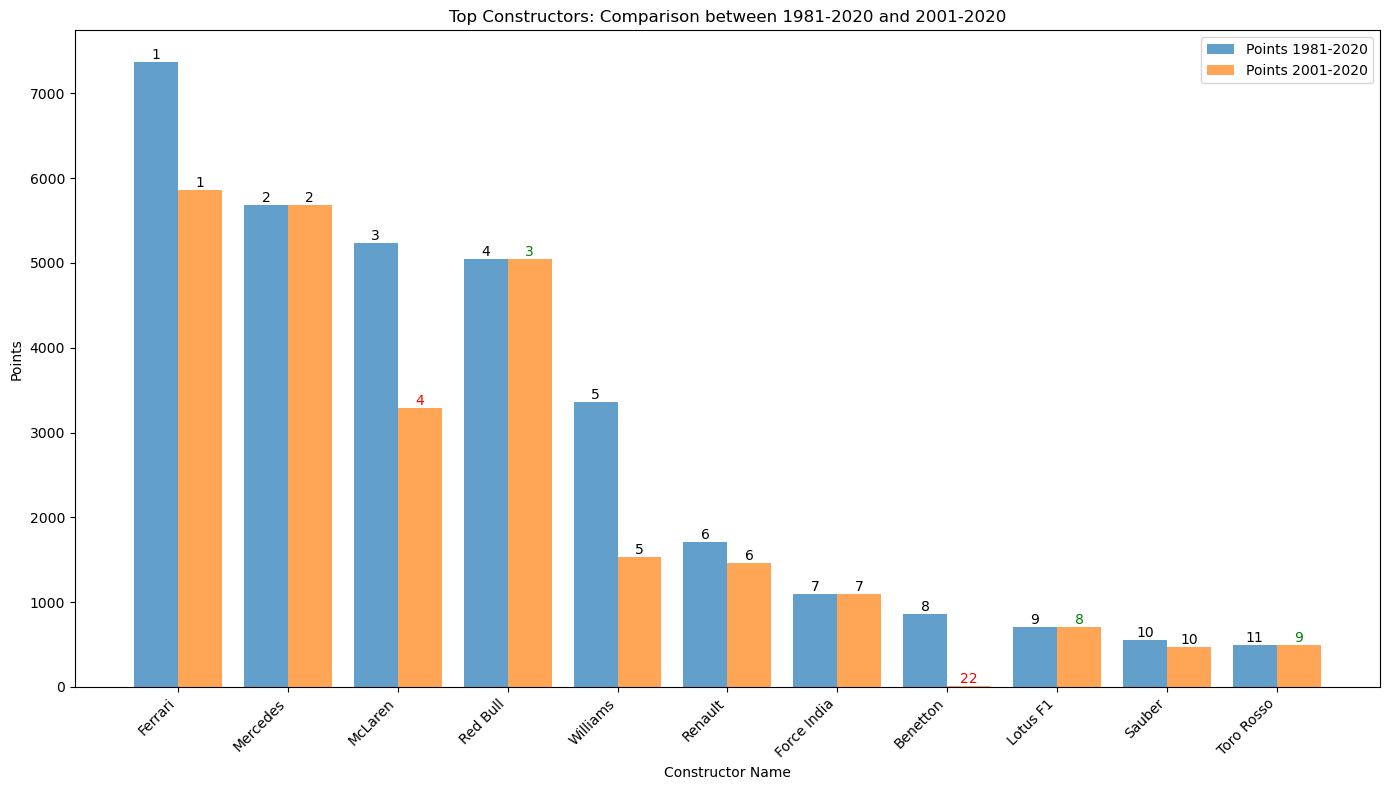

In [64]:
# filter 1981-2020 top 10 constructors
top_10_1981_2020 = rank_change.sort_values(by='rank_1981-2020').head(10)

# filter 2001-2020 top 10 constructors
top_10_2001_2020 = rank_change.sort_values(by='rank_2001-2020').head(10)

# combine the two sets, remove duplicates
top_10_combined = pd.concat([top_10_1981_2020, top_10_2001_2020]).drop_duplicates()

# set constructor names as index for plotting
top_10_combined.set_index('constructor_name', inplace=True)

# set figure size
plt.figure(figsize=(14, 8))

# set bar width and position
bar_width = 0.4
index = np.arange(len(top_10_combined))

# plot the two bars side by side (overlapping)
bar1 = plt.bar(index, top_10_combined['points_1981-2020'], bar_width, label='Points 1981-2020', alpha=0.7)
bar2 = plt.bar(index + bar_width, top_10_combined['points_2001-2020'], bar_width, label='Points 2001-2020', alpha=0.7)

# add rank labels on top of each bar with conditional coloring
for i, (rank_1981, rank_2001) in enumerate(zip(top_10_combined['rank_1981-2020'], top_10_combined['rank_2001-2020'])):
    # Adding rank for 1981-2020 in default color (black)
    plt.text(i, top_10_combined['points_1981-2020'][i], f'{int(rank_1981)}', ha='center', va='bottom', fontsize=10)
    
    # Determine color based on rank change: red if rank increased, green if decreased
    color = 'red' if rank_2001 > rank_1981 else 'green' if rank_2001 < rank_1981 else 'black'
    # adding rank for 2001-2020 with conditional color
    plt.text(i + bar_width, top_10_combined['points_2001-2020'][i], f'{int(rank_2001)}', ha='center', va='bottom', fontsize=10, color=color)

# labels and titles
plt.title('Top Constructors: Comparison between 1981-2020 and 2001-2020')
plt.xlabel('Constructor Name')
plt.ylabel('Points')
plt.xticks(index + bar_width / 2, top_10_combined.index, rotation=45, ha='right')
plt.legend()


plt.tight_layout()
plt.show()


# Question d 
**How many different drivers did Ferrari have between 1981 and 2020?**

**coding steps：**
- using dataset: "ferrari_results" which come from raw dataset "results_raw" by find ferrari's id and pick ferrari's result
- find the unique driver IDs and count them

In [65]:
# import data
results_raw = pd.read_csv("/Users/jiangshuyue/Desktop/QTM/qtm530fall2024/Formula1/results.csv")
results_raw

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26514,26520,1132,839,214,31,18,16,16,16,0.0,50,\N,\N,46,16,1:30.875,233.371,12
26515,26521,1132,815,9,11,0,17,17,17,0.0,50,\N,\N,50,6,1:29.707,236.409,12
26516,26522,1132,855,15,24,14,18,18,18,0.0,50,\N,\N,43,17,1:31.014,233.014,12
26517,26523,1132,847,131,63,1,\N,R,19,0.0,33,\N,\N,3,19,1:31.298,232.289,34


In [66]:
# descriptive statistics
# check the shape of the dataset
print("Results Raw Shape:", results_raw.shape)

# check for missing values in the dataset
print("\nMissing Values in Results Raw:")
print(results_raw.isnull().sum())

# compute descriptive statistics for the dataset
print("\nDescriptive Statistics for Results Raw:")
print(results_raw.describe(include='all'))


Results Raw Shape: (26519, 18)

Missing Values in Results Raw:
resultId           0
raceId             0
driverId           0
constructorId      0
number             0
grid               0
position           0
positionText       0
positionOrder      0
points             0
laps               0
time               0
milliseconds       0
fastestLap         0
rank               0
fastestLapTime     0
fastestLapSpeed    0
statusId           0
dtype: int64

Descriptive Statistics for Results Raw:
            resultId        raceId      driverId  constructorId number  \
count   26519.000000  26519.000000  26519.000000   26519.000000  26519   
unique           NaN           NaN           NaN            NaN    130   
top              NaN           NaN           NaN            NaN      4   
freq             NaN           NaN           NaN            NaN   1007   
mean    13260.940986    546.376560    274.357291      49.801161    NaN   
std      7656.813206    309.642244    279.275606      61.0914

In [67]:
results_from_1981_to_2020 = pd.merge(results_raw[['resultId','raceId','driverId','constructorId']],# each constructor's points
                                     race_information_from_1981_to_2020[["raceId","year"]],# here is race id from 1981 to 2020
                                     on = "raceId",
                                     how = "right")#save all the race result from 1981 to 2020
results_from_1981_to_2020

,resultId,raceId,driverId,constructorId,year
0,7554,1,18,23,2009
1,7555,1,22,23,2009
2,7556,1,15,7,2009
3,7557,1,10,7,2009
4,7558,1,4,4,2009
...,...,...,...,...,...
16645,24961,1047,841,51,2020
16646,24962,1047,849,3,2020
16647,24963,1047,825,210,2020
16648,24964,1047,850,210,2020


In [68]:
# find ferrari's id
ferrari_constructor_id = constructor_information_raw[constructor_information_raw['name'] == 'Ferrari']['constructorId'].values[0]
ferrari_constructor_id

6

In [69]:
# pick ferrari's result
ferrari_results = results_from_1981_to_2020[results_from_1981_to_2020['constructorId'] == ferrari_constructor_id]
ferrari_results

,resultId,raceId,driverId,constructorId,year
14,7568,1,8,6,2009
15,7569,1,13,6,2009
28,7582,2,13,6,2009
33,7587,2,8,6,2009
49,7603,3,8,6,2009
...,...,...,...,...,...
16602,24918,1045,20,6,2020
16621,24937,1046,20,6,2020
16629,24945,1046,844,6,2020
16642,24958,1047,844,6,2020


In [70]:
# find the unique driver IDs and count them   (using nunique())
unique_drivers = ferrari_results['driverId'].nunique()
unique_drivers

25

# answer d 
**How many different drivers did Ferrari have between 1981 and 2020?**
- answer:25

# Question e 
**What was the best year for Ferrari between 1981 and 2020?**

**Coding steps：**
- using dataset: "constructor_results_from_1981_to_2020"
- calculate the total points of each constructor every year
- for each year, rank the constructors based on their points.
- only choose data of ferrari（constructorId = 6，found in question d）
- find the highest rank in ferrari rank
- print the years with the highest rank


In [71]:
constructor_results_from_1981_to_2020

,constructorResultsId,raceId,constructorId,points,status,year
0,3823,1,23,18.0,\N,2009
1,3824,1,1,0.0,\N,2009
2,3825,1,7,11.0,\N,2009
3,3826,1,4,4.0,\N,2009
4,3827,1,3,3.0,\N,2009
...,...,...,...,...,...,...
8573,16225,1047,211,1.0,\N,2020
8574,16226,1047,51,0.0,\N,2020
8575,16227,1047,6,0.0,\N,2020
8576,16228,1047,3,0.0,\N,2020


In [72]:
# calculate the total points of each constructor every year
constructor_yearly_totalPoint = constructor_results_from_1981_to_2020.groupby(['constructorId', 'year']).agg(constructor_yearly_total_point=('points', 'sum')).reset_index()
constructor_yearly_totalPoint

,constructorId,year,constructor_yearly_total_point
0,1,1981,28.0
1,1,1982,69.0
2,1,1983,34.0
3,1,1984,143.5
4,1,1985,90.0
...,...,...,...
512,210,2019,28.0
513,210,2020,3.0
514,211,2019,73.0
515,211,2020,210.0


In [73]:
# rank by year's point
constructor_yearly_totalPoint = constructor_yearly_totalPoint.sort_values(by=['year', 'constructor_yearly_total_point'], ascending=[True, False])

# add yearly rank to dataframe
constructor_yearly_totalPoint['rank'] = constructor_yearly_totalPoint.groupby('year')['constructor_yearly_total_point'].rank(ascending=False, method='dense')

#drop duplicate rows
constructor_yearly_totalPoint = constructor_yearly_totalPoint.drop_duplicates()

constructor_yearly_totalPoint


,constructorId,year,constructor_yearly_total_point,rank
45,3,1981,95.0,1.0
387,34,1981,61.0,2.0
85,4,1981,54.0,3.0
337,27,1981,44.0,4.0
119,6,1981,34.0,5.0
...,...,...,...,...
158,6,2020,131.0,6.0
516,213,2020,107.0,7.0
458,51,2020,8.0,8.0
513,210,2020,3.0,9.0


In [74]:
# only choose data of ferrari
ferrari_rank = constructor_yearly_totalPoint[constructor_yearly_totalPoint['constructorId'] == 6]
ferrari_rank


,constructorId,year,constructor_yearly_total_point,rank
119,6,1981,34.0,5.0
120,6,1982,74.0,1.0
121,6,1983,89.0,1.0
122,6,1984,57.5,2.0
123,6,1985,82.0,2.0
124,6,1986,37.0,4.0
125,6,1987,53.0,4.0
126,6,1988,65.0,2.0
127,6,1989,59.0,3.0
128,6,1990,110.0,2.0


In [75]:
ferrari_rank_sorted = ferrari_rank.sort_values(by='rank', ascending=True)
ferrari_rank_sorted

,constructorId,year,constructor_yearly_total_point,rank
138,6,2000,170.0,1.0
146,6,2008,172.0,1.0
142,6,2004,262.0,1.0
141,6,2003,158.0,1.0
140,6,2002,221.0,1.0
139,6,2001,179.0,1.0
137,6,1999,128.0,1.0
120,6,1982,74.0,1.0
121,6,1983,89.0,1.0
126,6,1988,65.0,2.0


In [76]:
# find the highest rank in ferrari rank
highest_rank = ferrari_rank_sorted['rank'].min()

# filter rows where the rank is equal to the highest rank
highest_rank_years = ferrari_rank_sorted[ferrari_rank_sorted['rank'] == highest_rank]['year']

# print the years with the highest rank
print(f'Ferrari highest rank: {highest_rank}, year: {highest_rank_years.tolist()}')

Ferrari highest rank: 1.0, year: [2000, 2008, 2004, 2003, 2002, 2001, 1999, 1982, 1983]


# Answer e：
**best years: 2000, 2008, 2004, 2003, 2002, 2001, 1999, 1982, 1983**
- "best" means rank #1

# Summary
- We compared the performance of F1 constructors in the periods 1981-2020 and 2001-2020.
- Ferrari and Mercedes hold the top ranks consistently in both periods, maintaining their positions (1st and 2nd respectively).
- McLaren ranks 3rd overall but drops to 4th in the 2001-2020 period. At the same time, Red Bull shows an improvement, moving from 4th to 3rd.
- The constructors ranked 5th and below have significantly fewer points compared to the top-ranked constructors, with their points falling to less than half of those in the leading group.
- The constructors ranked 5th to 10th have maintained stable ranks across both periods, except for Benetton, which shows a significant drop from 8th to 22nd in the second period.